<a href="https://colab.research.google.com/github/linearAlgebra2024/linearAlgebra/blob/feat-minsup/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,578 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and dire

In [31]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
from sklearn.preprocessing import StandardScaler

lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면','떡라면','짬뽕라면','만두라면','치즈라면','된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})
lamen

lamen1=pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


In [28]:
lamenEval=lamen1[['noodle','bowl','soup']]
lamenName=lamen1['name']

scaler=StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled=scaler.transform(lamenEval.values)

lamen_scaled.shape

from sklearn.decomposition import PCA

pca_lamen=PCA()
pca_lamen.fit(lamen_scaled)

X_pca_lamen = pca_lamen.transform(lamen_scaled)

print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

original data : (10, 3)
transform data : (10, 3)


In [11]:
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
  pc1 +=pca_lamen.components_[0][j]*lamen_scaled[:,j]
  pc2 +=pca_lamen.components_[1][j]*lamen_scaled[:,j]
  pc3 +=pca_lamen.components_[2][j]*lamen_scaled[:,j]

pc1 = pc1.reshape(10,1)
pc2 = pc2.reshape(10,1)
pc3 = pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3)==np.round(X_pca_lamen,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49632 (\N{HANGUL SYLLABLE SOE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*arg

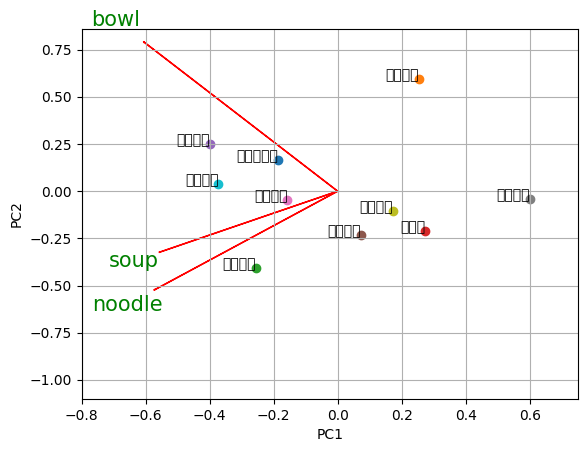

In [29]:
def biplot2(score, coeff, label, pcax, pcay, labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()-xs.min())
  scaley = 1.0/(ys.max()-ys.min())

  for i in range(len(xs)):
    plt.scatter(xs[i]*scalex, ys[i]*scaley)
    plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley),ha='right')

  for i in range(n):
    plt.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha=1)
    if labels is None:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,"vaer"+str(i+1),color='g',ha='center',va='center')
    else:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,labels[i],color='g',ha='center',va='center',size=15)

  plt.xlim(-0.8,0.75)
  plt.ylim(-1.1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family='NanumBarunGothic')
%matplotlib inline
biplot2(X_pca_lamen,pca_lamen.components_, lamenName, 1,2,labels=lamenEval.columns)